In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import ResNet50
import gradio as gr
from PIL import Image

# Check for GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"GPUs available: {len(gpus)}")
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("No GPU found, running on CPU.")

# Fix for multiprocessing on Windows
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"  # Suppress TensorFlow warnings


No GPU found, running on CPU.


Number of bird images: 165
Number of drone images: 165


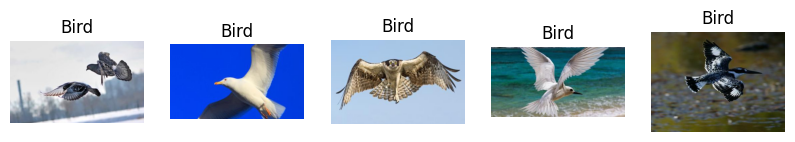

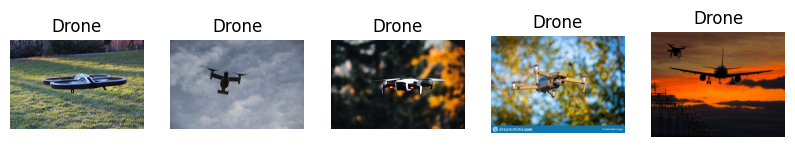

In [3]:
# Dataset paths
base_dir = r"D:\Downloads\archive (3)\drone_or_bird"
birds_dir = os.path.join(base_dir, "birds")
drones_dir = os.path.join(base_dir, "drones")

# Count files in each directory
bird_count = len(os.listdir(birds_dir))
drone_count = len(os.listdir(drones_dir))

print(f"Number of bird images: {bird_count}")
print(f"Number of drone images: {drone_count}")

# Visualize a few images
def visualize_samples(directory, title):
    images = os.listdir(directory)[:5]
    plt.figure(figsize=(10, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(directory, img_name)
        img = Image.open(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

visualize_samples(birds_dir, "Bird")
visualize_samples(drones_dir, "Drone")


In [4]:
# Image properties
img_size = (224, 224)
batch_size = 32

# Data generator
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 523 images belonging to 3 classes.
Found 129 images belonging to 3 classes.


In [5]:
# Build the model
base_model = ResNet50(input_shape=img_size + (3,), include_top=False, weights="imagenet")
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(256, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


d:\code\myvenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 104s 4s/step - accuracy: 0.2184 - loss: -17.9965 - val_accuracy: 0.2481 - val_loss: -15.8450
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.2342 - loss: -179.3903 - val_accuracy: 0.2481 - val_loss: -12.6082
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.2459 - loss: -512.6694 - val_accuracy: 0.2481 - val_loss: -12.8876
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.2307 - loss: -1267.1931 - val_accuracy: 0.2481 - val_loss: -8.8229
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.2654 - loss: -2529.3218 - val_accuracy: 0.2481 - val_loss: -7.2217
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.2208 - loss: -4357.9048 - val_accuracy: 0.2481 - val_loss: -4.0786
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.2287 - loss: -6229.3545 - val_accuracy: 0.2481 - val_loss: -2.1514
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 59s 3s/step - accuracy: 0.2674 - loss: -7383.

In [6]:
model_save_path = "drone_bird_classifier.h5"
model.save(model_save_path)
print(f"Model saved at {model_save_path}")


Model saved at drone_bird_classifier.h5


In [ ]:
# Define the Gradio pipeline function
def gradio_pipeline(image):
    analytics = predict_image(image)
    return analytics

# Define the interface using gr.Interface
interface = gr.Interface(
    fn=gradio_pipeline,
    inputs=gr.Image(type="pil"),  # Use gr.Image instead of gr.inputs.Image
    outputs="json",              # JSON output for predictions and analytics
    title="Drone or Bird Classifier",
    description="Upload an image to identify if it's a drone or a bird. Provides prediction confidence."
)

# Launch the interface
interface.launch()



* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "d:\code\myvenv\lib\site-packages\gradio\queueing.py", line 622, in process_events
    response = await route_utils.call_process_api(
  File "d:\code\myvenv\lib\site-packages\gradio\route_utils.py", line 323, in call_process_api
    output = await app.get_blocks().process_api(
  File "d:\code\myvenv\lib\site-packages\gradio\blocks.py", line 2014, in process_api
    result = await self.call_function(
  File "d:\code\myvenv\lib\site-packages\gradio\blocks.py", line 1567, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "d:\code\myvenv\lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "d:\code\myvenv\lib\site-packages\anyio\_backends\_asyncio.py", line 2405, in run_sync_in_worker_thread
    return await future
  File "d:\code\myvenv\lib\site-packages\anyio\_backends\_asyncio.py", line 914, in run
    result = context.run(func, *

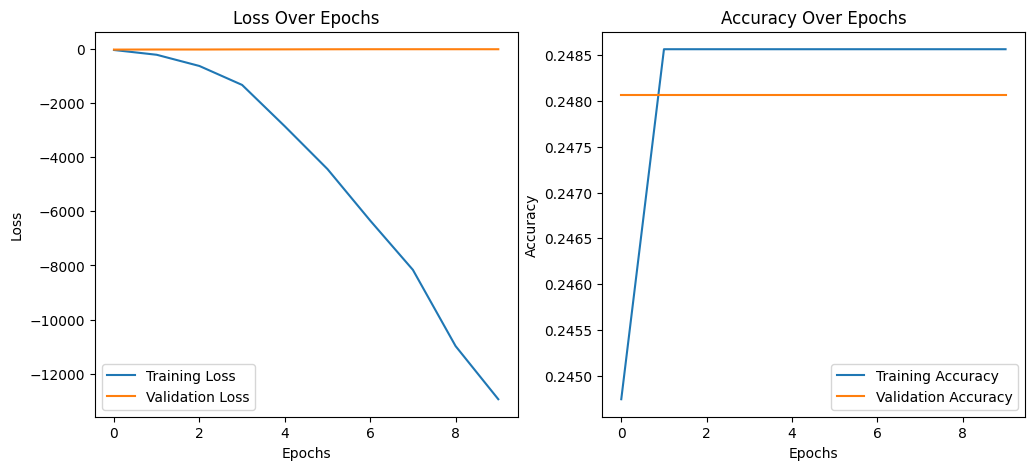

Using existing dataset file at: .gradio\flagged\dataset1.csv


In [8]:
# Plot Loss and Accuracy
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
